In [19]:
import torch
from torchvision import datasets, transforms
from torchvision.transforms import Normalize, ToTensor, Compose, Resize
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import os
from PIL import Image

In [64]:
base_transform = Compose([
    Resize((256, 256)),
    ToTensor(),
])

In [65]:
class CustomDataset(Dataset):
    def __init__(self, root_dir_images, root_dir_labels, transform=None):
        self.root_dir_images = root_dir_images
        self.root_dir_labels = root_dir_labels
        self.image_files = os.listdir(root_dir_images)
        self.label_files = os.listdir(root_dir_labels)
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir_images, self.image_files[idx])
        label_name = os.path.join(self.root_dir_labels, self.label_files[idx])
        image = Image.open(img_name)
        with open(label_name, 'r') as file:
            label_str = file.readline().strip()  # Read the label string
            # Parse the label string to obtain four floats
            label = [float(x) for x in label_str.split()]
            label = torch.tensor(label, dtype=torch.float32)
        if self.transform:
            image = self.transform(image)
        return image, label

In [66]:
# Define paths to your data
data_dir = 'data'
train_dir_images = os.path.join(data_dir, 'train', 'images')
train_dir_labels = os.path.join(data_dir, 'train', 'labels')
valid_dir_images = os.path.join(data_dir, 'valid', 'images')
valid_dir_labels = os.path.join(data_dir, 'valid', 'labels')

# Create datasets
train_dataset = CustomDataset(root_dir_images=train_dir_images, root_dir_labels=train_dir_labels, transform=base_transform)
valid_dataset = CustomDataset(root_dir_images=valid_dir_images, root_dir_labels=valid_dir_labels, transform=base_transform)

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

In [67]:
mean = torch.zeros(3)
std = torch.zeros(3)

SUBSET_SIZE = 1000

# Create a subset of the dataset
subset_indices = torch.randperm(len(train_dataset))[:SUBSET_SIZE]
subset = torch.utils.data.Subset(train_dataset, subset_indices)

for image, label in subset:
    mean += image.mean(dim = (1,2))
    std += image.std(dim = (1,2))

mean /= len(subset)
std /= len(subset)
print("Mean:", mean)
print("Standard deviation:", std)

Mean: tensor([0., 0., 0.])
Standard deviation: tensor([0., 0., 0.])


In [89]:
subset[0]

IndexError: list index out of range

In [84]:
i = 0
for image, label in subset:
    if i == 0:
        print(image.mean(dim = (1,2)))

In [78]:
mean = torch.zeros(3)

In [75]:
image, label = train_dataset[4]
image.mean(dim = (1,2))

tensor([0.0996, 0.0786, 0.0875])

In [52]:
# final transformation
final_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(means, sds)  # Apply normalization using the computed mean and std
])

In [53]:
# Recreate datasets
train_dataset = CustomDataset(root_dir_images=train_dir_images, root_dir_labels=train_dir_labels, transform=final_transform)
valid_dataset = CustomDataset(root_dir_images=valid_dir_images, root_dir_labels=valid_dir_labels, transform=final_transform)

# Recreate DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

In [55]:
image, label = train_dataset[0]

In [59]:
image

tensor([[[399.3104, 399.3104, 399.3104,  ..., 399.3104, 399.3104, 399.3104],
         [399.3104, 399.3104, 399.3104,  ..., 399.3104, 399.3104, 399.3104],
         [399.3104, 399.3104, 399.3104,  ..., 399.3104, 399.3104, 399.3104],
         ...,
         [399.3104, 399.3104, 399.3104,  ..., 399.3104, 399.3104, 399.3104],
         [399.3104, 399.3104, 399.3104,  ..., 399.3104, 399.3104, 399.3104],
         [399.3104, 399.3104, 399.3104,  ..., 399.3104, 399.3104, 399.3104]],

        [[376.1889, 376.1889, 376.1889,  ..., 376.1889, 376.1889, 376.1889],
         [376.1889, 376.1889, 376.1889,  ..., 376.1889, 376.1889, 376.1889],
         [376.1889, 376.1889, 376.1889,  ..., 376.1889, 376.1889, 376.1889],
         ...,
         [376.1889, 376.1889, 376.1889,  ..., 376.1889, 376.1889, 376.1889],
         [376.1889, 376.1889, 376.1889,  ..., 376.1889, 376.1889, 376.1889],
         [376.1889, 376.1889, 376.1889,  ..., 376.1889, 376.1889, 376.1889]],

        [[481.2291, 481.2291, 481.2291,  ...

In [56]:
image[0].mean()
image.mean(dim = (1,2))

tensor([1161.1423, 1042.7136, 1430.7164])

In [57]:
len(train_dataset)

10188

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


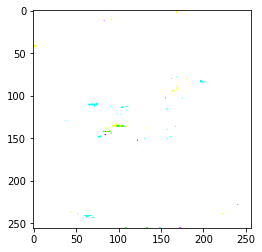

In [58]:
image_np = image.permute(1, 2, 0).numpy()
plt.imshow(image_np)